## Bayes rule introduction
based on [training by Allen Downey](https://allendowney.github.io/BayesianDecisionAnalysis/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's imagine we want to play one machine in a casino. Before we start we need to estimate the probability of winning. The probability of winning will be between 0 and 100.

In [2]:
# probability of winning
# these can be seen as hypotheses x=0 is a hypothesis of 0% of winning
# x = 100 is a hyposesis of 100% of wining 
xs = np.arange(101)
xs

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [3]:
# prior probability
# at the start each hypothesis is equally probable
p = 1 / len(xs)
p

0.009900990099009901

Now we can use Pandas series to have xs as index and probabilities as values.

In [4]:
# useful function to add titles to plot
def decorate(title=""):
    '''function that adds descriptions to axes'''
    plt.xlabel("Probability of winning")
    plt.ylabel("PMF")
    plt.title(title)

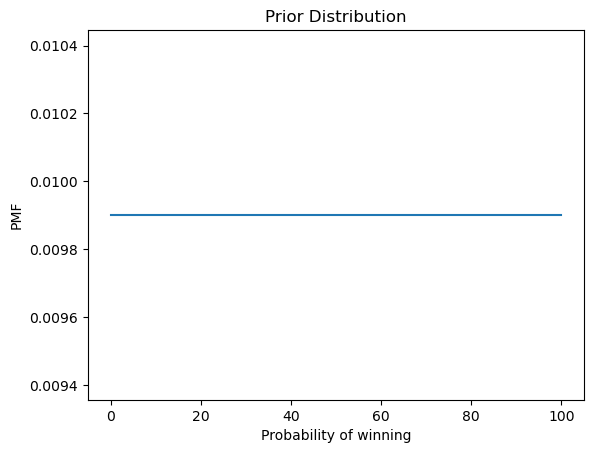

In [5]:
prior = pd.Series(p, index=xs)
prior.plot()
decorate("Prior Distribution")

### Bayesian update
Now let's see how the probabilities will change if I play the machine. Sometimes I will win and sometimes I will lose. This will update my probability of winning.
For the moment, let's assume I won once.

In [6]:
# probability of winning
likelihood_win = xs / 100 # because xs are given as integers and prbability should be from 0 to 1

In [7]:
# Bayesian update
posterior  = prior * likelihood_win # this is unnormalized posterior probability

# total probability of the data
posterior.sum()

0.5000000000000001

In [8]:
# normalized posterior probability (meaning sum is 1)
posterior /= posterior.sum()
posterior.sum()

1.0

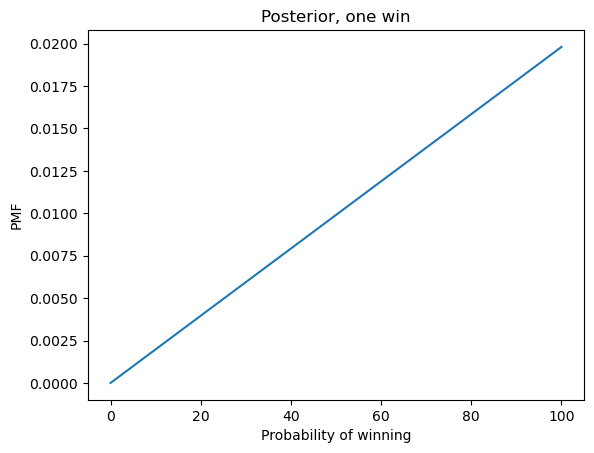

In [9]:
posterior.plot()
decorate("Posterior, one win")

Since I won the first time I played, I assume the more I play the bigger probability of winning (hence the linear function).
Now let's assume we play again and win again.

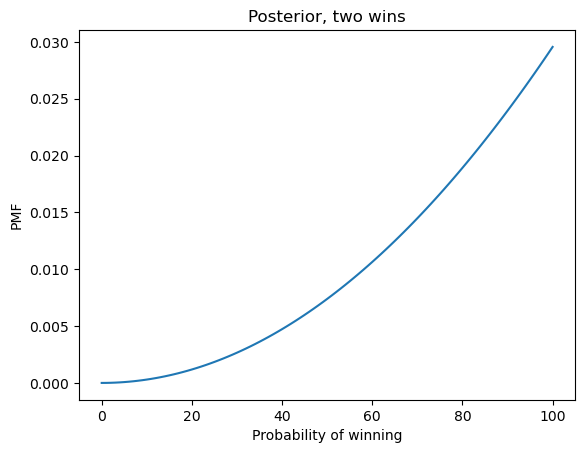

In [10]:
posterior2 = posterior * likelihood_win
posterior2 /= posterior2.sum()
posterior2.plot()
decorate("Posterior, two wins")

We play again but this time we lose.

In [11]:
# likelihood of losing
likelihood_loss = 1 - likelihood_win

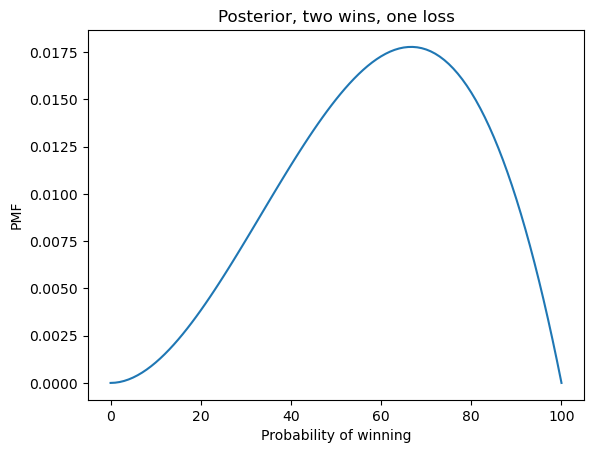

In [12]:
posterior3 = posterior2 * likelihood_loss
posterior3 /= posterior3.sum()
posterior3.plot()
decorate("Posterior, two wins, one loss")

Now because I have seen a loss, then probabily of winning 100% is 0. But it is also not 0% because I have seen wins too. But since I played only three times, it is still quite uncertain what the actual probability of win is.

Now let us automatize the process of updating a prior with a function.

In [13]:
def update(pmf, data):
    """Update of prior disribution for playing a machine
    
    pmf:    Pandas series representing prior disribution
    data:   string, wither win 'W' or loss 'L'
    """
    if data == "W":
        likelihood = likelihood_win
    else:
        likelihood = likelihood_loss
    
    pmf *= likelihood
    pmf /= pmf.sum()

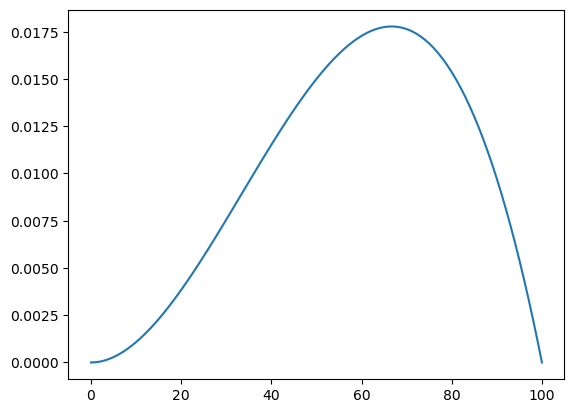

In [15]:
# checking the functioning of the update
pmf = prior.copy()
update(pmf, 'W')
update(pmf, 'W')
update(pmf, 'L')
pmf.plot();

In [16]:
# let's play the machine 10 times now
outcomes = 'WLLLWLLWLL'

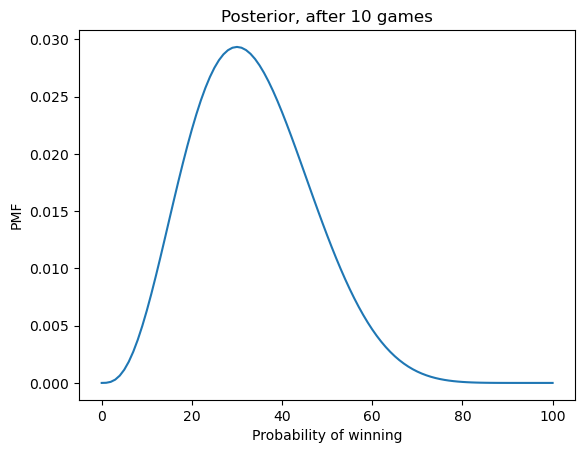

In [17]:
pmf = prior.copy()
for n in outcomes:
    update(pmf, n)

pmf.plot()
decorate("Posterior, after 10 games")
